In [1]:
import sympy as sy
from sympy.physics.vector import ReferenceFrame,dynamicsymbols
from sympy.physics.mechanics import inertia
from sympy.physics.vector.printing import vlatex

import IPython
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np

from scipy.integrate import odeint

def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

$\newpage$

## (1) Dual spin spacecraft.

In class, we derived the linear stability conditions for a dual-spin spacecraft where the constant fly-wheel spin axis was aligned with $\hat{b}_1$. For this homework problem, re-derive the linear stability conditions for the case when the fly-wheel spin axis is aligned with the third body axis, $\hat{b}_3$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

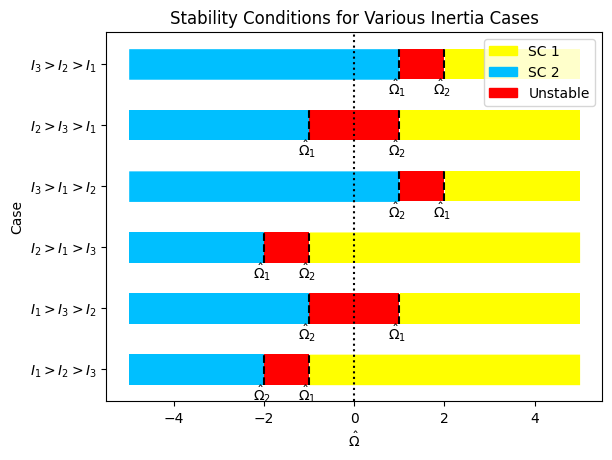

In [2]:
t = sy.Symbol("t")

B = ReferenceFrame("B")

I1 = sy.Symbol("I_1")
I2 = sy.Symbol("I_2")
I3 = sy.Symbol("I_3")

I = inertia(ixx=I1,iyy=I2,izz=I3,frame=B)

If3 = inertia(ixx=0,iyy=0,izz=sy.Symbol("I_f"),frame=B)
wf3 = sy.Symbol("Omega")*B.z

w1 = dynamicsymbols("omega_1")
w2 = dynamicsymbols("omega_2")
w3 = dynamicsymbols("omega_3")

wb = w1*B.x+w2*B.y+w3*B.z

displayH("Deriving Rotational Equations of Motion:")

H = I.dot(wb)
H+=If3.dot(wf3)

H_dot = sy.diff(H,t,B)+wb.cross(H)
omega_dot = sy.solve(H_dot.to_matrix(B),[sy.diff(w1),sy.diff(w2),sy.diff(w3)])

omega_dot_vector = 0
for key,direction in zip(omega_dot,[B.x,B.y,B.z]):
    omega_dot_vector += omega_dot[key]*direction

displayH(sy.Symbol(r"H="),sy.Symbol(vlatex(H.to_matrix(B))))
displayH(sy.Symbol(r"\dot{H}="),sy.Symbol(vlatex(H_dot.to_matrix(B))))

displayH("Assuming no external torque:")
displayH(sy.Symbol(r"\dot{H}=0"))
displayH(sy.Symbol(r"\dot{\omega}="),sy.Symbol(vlatex(omega_dot_vector.to_matrix(B).simplify())))

equilibrium_solutions = sy.solve(omega_dot_vector.to_matrix(B),[w1,w2,w3])

delta_omega = dynamicsymbols(r"\delta\omega_1")*B.x
delta_omega+=dynamicsymbols(r"\delta\omega_2")*B.y
delta_omega+=dynamicsymbols(r"\delta\omega_3")*B.z

displayH("Equilibrium Points:")
for sol in equilibrium_solutions:
    displayH(sy.Symbol(r"\omega_0="),sy.Matrix(sol))

for sol in equilibrium_solutions:
    if np.count_nonzero(sol) == 1:
        displayH("Using the following equilibrium points:")
        displayH(sy.Symbol(r"\omega_0="),sy.Matrix(sol))

        omega = (sol[0]*B.x+sol[1]*B.y+sol[2]*B.z+delta_omega).to_matrix(B)
        eq = omega_dot_vector.subs(w1,omega[0]).subs(w2,omega[1]).subs(w3,omega[2])
        eq = eq.to_matrix(B).expand()

        displayH("Plugging in disturbances from equilibrium point:")
        displayH(sy.Symbol(r"\delta\omega ="),omega)
        displayH(sy.Symbol(r"\dot{\delta\omega}="),eq)

        displayH("Ignoring delta product terms:")
        for s1 in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
            for s2 in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
                eq = eq.subs(s1*s2,0)
        
        displayH(sy.Symbol(r"\dot{\delta\omega}="),eq)

        stable_system = 0
        for piece,direction in zip(eq,[B.x,B.y,B.z]):
            stable_system+=piece*direction
        stable_system_dot = sy.diff(stable_system,t,B)
        stable_system_dot = stable_system_dot.subs(sy.diff(w1),0).subs(sy.diff(w2),0).subs(sy.diff(w3),0)
        
        displayH("Taking the 2nd derivative, and plugging the 1st derivative into the second derivative:")

        for w,piece in zip([dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")],eq):
            stable_system_dot = stable_system_dot.subs(sy.diff(w),piece)

        displayH(sy.Symbol(r"\ddot{\delta\omega}="),stable_system_dot.to_matrix(B).simplify())

        for i in sol:
            for o in [w1,w2,w3]:
                if i == o:
                    displayH("Normalizing Omega:")
                    displayH(sy.Symbol(r"\hat{\Omega} ="),sy.Symbol(r"\Omega")/i)
                    
                    stable_system_dot = stable_system_dot.subs(sy.Symbol("Omega"),sy.Symbol(r"\hat{\Omega}")*i).simplify()
                    displayH(sy.Symbol(r"\delta\ddot{\omega}="),stable_system_dot.to_matrix(B))
                    break

        displayH("Stability Equations:")
        for line in stable_system_dot.to_matrix(B):
            for s in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
                val = line.coeff(s)
                if val != 0:
                    selection = val
                    displayH(sy.Symbol(vlatex(sy.diff(sy.diff(s)))),"=",sy.Symbol("k"),sy.Symbol(vlatex(s)),sy.Symbol(r"\rightarrow k="),val,sy.Symbol(">0"))
        
        displayH("Solving for Normalized Omega:")
        o2,o1 = sy.solve(selection,sy.Symbol(r"\hat{\Omega}"))
        displayH(sy.Symbol(r"\hat{\Omega}_1 ="),o1)
        displayH(sy.Symbol(r"\hat{\Omega}_2 ="),o2)

        w = np.linspace(-5,5,1000)

        handles = [Patch(color="yellow",label="SC 1"),
                   Patch(color="deepskyblue",label="SC 2"),
                   Patch(color="red",label="Unstable")]
        
        plt.figure()
        y = 1
        labels = []
        for a in [1,2,3]:
            for b in [1,2,3]:
                for c in [1,2,3]:
                    if len(np.unique([a,b,c]))>=3:
                        s1 = float(o1.subs(I1,a).subs(I2,b).subs(I3,c).subs(sy.Symbol("I_f"),1))
                        s2 = float(o2.subs(I1,a).subs(I2,b).subs(I3,c).subs(sy.Symbol("I_f"),1))

                        plt.plot(2*[s1],[y-0.25,y+0.25],color="black",linestyle="dashed")
                        plt.plot(2*[s2],[y-0.25,y+0.25],color="black",linestyle="dashed")
                        plt.annotate(r"$\hat{\Omega}_1$",(s1-0.25,y-0.5))
                        plt.annotate(r"$\hat{\Omega}_2$",(s2-0.25,y-0.5))
                        
                        # SC 1
                        sc1 = np.array([o > s1 and o > s2 for o in w])
                        plt.fill_between(w[sc1],y1=len(w[sc1])*[y-0.25],y2=len(w[sc1])*[y+0.25],color="yellow",linewidth=0)
                        # SC 2
                        sc2 = np.array([o < s1 and o < s2 for o in w])
                        plt.fill_between(w[sc2],y1=len(w[sc2])*[y-0.25],y2=len(w[sc2])*[y+0.25],color="deepskyblue",linewidth=0)
                        # Unstable
                        unstable = ~(sc1|sc2)
                        plt.fill_between(w[unstable],y1=len(w[unstable])*[y-0.25],y2=len(w[unstable])*[y+0.25],color="red",linewidth=0)
                        y+=1
                        order = np.argsort([a,b,c])+1
                        labels.append(f"${sy.Symbol(f"I_{order[0]} > I_{order[1]} > I_{order[2]}")}$")

        plt.axvline(x=0,linestyle="dotted",color="black")
        plt.title("Stability Conditions for Various Inertia Cases")
        plt.yticks(range(1,len(labels)+1),labels)
        plt.ylabel("Case")
        # plt.xticks([0])
        plt.xlabel(r"$\hat{\Omega}$")
        plt.legend(handles=handles)
        plt.show()

$\newpage$

## (2) Gravity-gradient stability conditions.
The following characteristic equation for the gravity-gradient stability was derived in class:

$$
\lambda^4+\lambda^2n^2(1+3k_Y+k_Yk_R)+4n^4k_Yk_R=0
$$

Verify that the necessary and sufficient conditions that guarantee stability are:

$$
(1+3k_Y+k_Yk_R)^2>16k_Yk_R \\
k_Yk_R > 0
$$

Hint:
- The characteristic equation is a quadratic in $\lambda^2$.
- Stability requires that none of the roots have a positive real part.
- It is clear that if $\lambda_i$ is a root, then $-\lambda_i$ is also a root.
- So stability requires all the roots be purely imaginary numbers.
- Therefore, you need to verify that the stability conditions guarantee that all $\lambda_i^2$ terms are negative and real.

##### Solution:

Solving the quartic as a quadratic:

$$
a = 1 \\
b = n^2(1+3k_Y+k_Yk_R) \\
c = 4n^4k_Yk_R\\
\lambda^2 = \frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

Real part must be negative:

$$
-b < 0 \\
-n^2(1+3k_Y+k_Yk_R) < 0 \\
$$
$$
\begin{equation}\tag{1}
(1+3k_Y+k_Yk_R) < 0
\end{equation}
$$

Roots must be real:

$$
b^2-4ac > 0
n^4(1+3k_Y+k_Yk_R)^2-16n^4k_Yk_R > 0
$$
$$
\begin{equation}\tag{2}
(1+3k_Y+k_Yk_R)^2 > 16k_Tk_R
\end{equation}
$$

Using Equation 2, we can rewrite Equation 1 to match the prompt:

$$
0^2> (1+3k_Y+k_Yk_R)^2 > 16k_Tk_R \\
0 > 16k_Yk_R \\
0 > k_Yk_R
$$

This results in the following two inequalities (Equation 1 and Equation 2), which guarantee that the roots will be real and negative:

$$
\begin{equation}\tag{3}
(1+3k_Y+k_Yk_R)^2 > 16k_Tk_R
\end{equation}
$$

$$
\begin{equation}\tag{4}
k_Yk_R > 0
\end{equation}
$$

These inequality conditions can be seen in the following python plot:

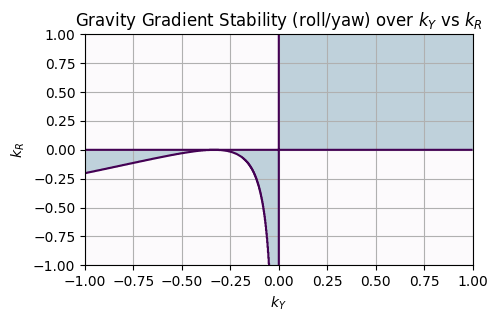

In [3]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)

def roll_yaw_stability_1(ky,kr):
    return (1+3*ky+ky*kr)**2>16*ky*kr
s
def roll_yaw_stability_2(ky,kr):
    return kr*ky>0

roll_yaw_1_vals = roll_yaw_stability_1(X,Y)
roll_yaw_2_vals = roll_yaw_stability_2(X,Y)

plt.figure(figsize=(5,3))
plt.title(r"Gravity Gradient Stability (roll/yaw) over $k_Y$ vs $k_R$")
plt.xlabel(r"$k_Y$")
plt.ylabel(r"$k_R$")
plt.grid()

plt.contour(x,y,roll_yaw_1_vals)
plt.contour(x,y,roll_yaw_2_vals)

plt.contourf(x,y,~(roll_yaw_1_vals&roll_yaw_2_vals).astype(int),alpha=0.25,cmap='PuBu_r')

plt.show()

$\newpage$

## (3) Gravity-gradient stability simulation.
The linearized equations of motion for the gravity-gradient satellite derived in class
are as follows:

$$
\ddot{\theta} + 3n^2 \left( \frac{I_1 - I_3}{I_2} \right) \theta = 0 
\quad \text{...for the pitch angle}
$$

$$
\begin{pmatrix}
\dot{\phi} \\
\dot{\psi}
\end{pmatrix}
+ 
\begin{bmatrix}
0 & 0 \\
n(k_R - 1) & n(1 - k_Y)
\end{bmatrix}
\begin{pmatrix}
\phi \\
\psi
\end{pmatrix}
+
\begin{bmatrix}
4n^2 k_Y & 0 \\
0 & n^2 k_R
\end{bmatrix}
\begin{pmatrix}
\phi \\
\psi
\end{pmatrix}
= 
\begin{pmatrix}
0 \\
0
\end{pmatrix}
\quad \text{...for the roll-yaw angles}
$$

where,

$$
k_R = \frac{I_2 - I_1}{I_3}, \\
k_Y = \frac{I_2 - I_3}{I_1}, \\
n = \text{mean motion}
$$

A satellite is in a 7000 km circular orbit around the Earth ($\mu = 398600.4418 \, \text{km}^3/\text{s}^2$).The initial conditions for the Euler angles and the Euler angle rates are:

$(\phi_0, \theta_0, \psi_0) = (30^\circ, 20^\circ, 10^\circ) \quad \text{and} \quad (\dot{\phi}_0, \dot{\theta}_0, \dot{\psi}_0) = (0, 0, 0) \, \text{rad/s}$.

Further, the following three sets of initial conditions for the moment of inertia matrix are given:

$$
I_{I} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{BIG}} & 0 & 0 \\
0 & I_{\text{Inter}} & 0 \\
0 & 0 & I_{\text{small}}
\end{bmatrix}
$$

$$
I_{II} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{Inter}} & 0 & 0 \\
0 & I_{\text{BIG}} & 0 \\
0 & 0 & I_{\text{small}}
\end{bmatrix}
$$

$$
I_{III} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{small}} & 0 & 0 \\
0 & I_{\text{Inter}} & 0 \\
0 & 0 & I_{\text{BIG}}
\end{bmatrix}
$$

where,

$$
I_{\text{BIG}} = 400 \, \text{kg m}^2, \\
I_{\text{Inter}} = 300 \, \text{kg m}^2, \\
I_{\text{small}} = 200 \, \text{kg m}^2.
$$

Perform the following tasks:

### (a) State-Space Form
Convert the three second-order differential equations of motion into six first-order differential equations, i.e., express the equations of motion in the state-space form.

#### Solution:

State Space Form:

$$
\dot{\textbf{x}}=A\textbf{x}
$$

$$
\textbf{x} = \left(\begin{array}{c}
\phi \\
\theta \\
\psi \\
\dot{\phi} \\
\dot{\theta} \\
\dot{\psi}
\end{array}\right)
$$

$$
\dot{\textbf{x}} = \left(\begin{array}{c}
\dot{\phi} \\
\dot{\theta} \\
\dot{\psi} \\
\ddot{\phi} \\
\ddot{\theta} \\
\ddot{\psi}
\end{array}\right)=
\left[\begin{array}{c|c|c|c|c|c}
0&0&0&1&0&0 \\
\hline
0&0&0&0&1&0 \\
\hline
0&0&0&0&0&1 \\
\hline
-4n^2k_Y&0&0&0&0&-n(1-k_Y) \\
\hline
0&-3n^2\left(\frac{I_1-I_3}{I_2}\right)&0&0&0&0 \\
\hline
0&0&-n^2k_R&-n(k_R-1)&0&0
\end{array}\right]
\left(\begin{array}{c}
\phi \\
\theta \\
\psi \\
\dot{\phi} \\
\dot{\theta} \\
\dot{\psi}
\end{array}\right)
$$

$\newpage$

#### (b) Integrating
Use MATLAB’s ”ode45” function (or equivalent integration packages in other software) to numerically integrate the first-order differential equations of motion for a time period of 10, 000 seconds for the given three sets of initial conditions for the moment of inertia matrix.

##### Solution:

In [4]:
mu = 398600.4418
a = 7000
init_state = np.radians([30,20,10,0,0,0])

I_big = 400
I_inter = 300
I_small = 200

I1 = [I_big,I_inter,I_small]
I2 = [I_inter,I_big,I_small]
I3 = [I_small,I_inter,I_big]

def gravity_gradient(x,t,mu,a,I):
    n = (mu/a**3)**0.5
    k_R = (I[1]-I[0])/I[2]
    k_Y = (I[1]-I[2])/I[0]
    return np.array([[0,0,0,1,0,0],
                     [0,0,0,0,1,0],
                     [0,0,0,0,0,1],
                     [-4*n**2*k_Y,0,0,0,0,-n*(1-k_Y)],
                     [0,-3*n**2*(I[0]-I[2])/I[1],0,0,0,0],
                     [0,0,-n**2*k_R,-n*(k_R-1),0,0]])@x

times = np.arange(0,10000,0.1)
tol = 1e-12

state1 = np.degrees(odeint(gravity_gradient,init_state,
                           times,rtol=tol,atol=tol,args=(mu,a,I1)).T)
state2 = np.degrees(odeint(gravity_gradient,init_state,
                           times,rtol=tol,atol=tol,args=(mu,a,I2)).T)
state3 = np.degrees(odeint(gravity_gradient,init_state,
                           times,rtol=tol,atol=tol,args=(mu,a,I3)).T)

$\newpage$

### (c) Plotting
Plot the Euler angles φ(t), θ(t), and ψ(t) over the time interval t = (0, 0.1, 0.2, . . . 10000) for all three sets of initial conditions. Be sure to wrap the numerically integrated Euler angles between the range [−π, π].

#### Solution:

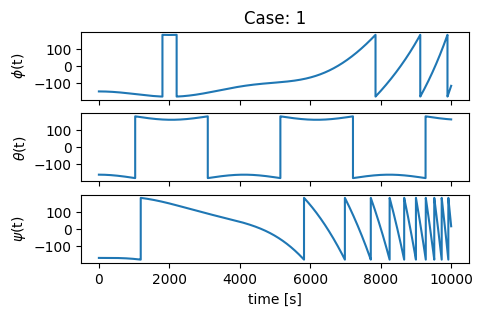

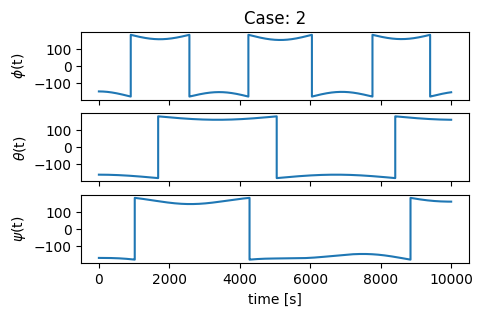

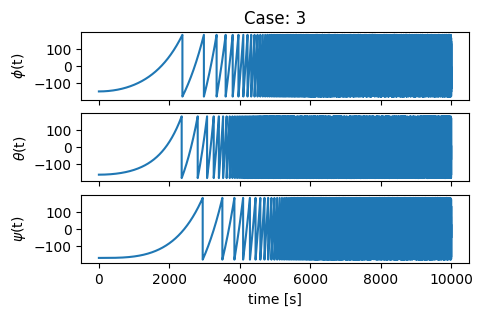

In [5]:
plotting_vars = 3

for case_num,state in enumerate([state1,state2,state3]):
    fig,axes = plt.subplots(plotting_vars,sharex=True,figsize=(5,3))
    axes[0].set_title(f"Case: {case_num+1}")
    for idx,var_name in enumerate([r"$\phi$",
                                   r"$\theta$",
                                   r"$\psi$",
                                   r"$\dot{\psi}$",
                                   r"$\dot{\theta}$",
                                   r"$\dot{\phi}$"][:plotting_vars]):
        if idx < 3:
            axes[idx].plot(times,np.interp(state[idx]%360,(0,360),(-180,180)))
        else:
            axes[idx].plot(times,state[idx])
        axes[idx].set_ylabel(var_name+"(t)")
    axes[-1].set_xlabel("time [s]")
    plt.show()

$\newpage$

### (d) Discussion
Discuss the stability of the pitch angle as well as the coupled roll-yaw angle stability for the three sets of initial conditions. Provide an explanation based on your observations.

#### Solution:

From the plots in part (c), we see that the only stable case is Case 2. Case 3 is unstable, and can be seen to start tumbling around 1000s. Case 1 is also roll/yaw unstable, and it can be seen to start tumbling around 5000 seconds. The only stable case is Case 2, where there is no tumbling seen. This makes sense as well, as Case 2 is seen to lie within the Lagrange Region of stability, Case 1 lies within pitch stability, and Case 3 lies outside of all regions of stability.

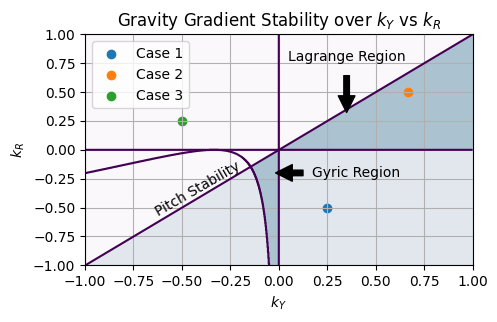

In [6]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)

def roll_yaw_stability_1(ky,kr):
    return (1+3*ky+ky*kr)**2>16*ky*kr
def roll_yaw_stability_2(ky,kr):
    return kr*ky>0
def pitch_stability(ky,kr):
    return ky>kr

roll_yaw_1_vals = roll_yaw_stability_1(X,Y)
roll_yaw_2_vals = roll_yaw_stability_2(X,Y)
pitch_vals = pitch_stability(X,Y)

plt.figure(figsize=(5,3))
plt.title(r"Gravity Gradient Stability over $k_Y$ vs $k_R$")
plt.xlabel(r"$k_Y$")
plt.ylabel(r"$k_R$")
plt.grid()
plt.contour(x,y,roll_yaw_1_vals)
plt.contour(x,y,roll_yaw_2_vals)
plt.contour(x,y,pitch_vals)
plt.contourf(x,y,~(roll_yaw_1_vals&roll_yaw_2_vals&pitch_vals).astype(int),alpha=0.25,cmap='PuBu_r')
plt.contourf(x,y,~(pitch_vals).astype(int),alpha=0.1,cmap='PuBu_r')
plt.annotate("Lagrange Region",xytext=(0.35,0.8),xy=(0.35,0.25),
             ha="center",va="center",arrowprops=dict(facecolor='black', shrink=0.15))
plt.annotate("Gyric Region",xytext=(0.4,-0.2),xy=(-0.05,-0.2),
             ha="center",va="center",arrowprops=dict(facecolor='black', shrink=0.15))
plt.annotate("Pitch Stability",xy=(-0.65,-0.575),rotation=30.0)
for case_num,I in enumerate([I1,I2,I3],start=1):
    kr = (I[1]-I[0])/I[2]
    ky = (I[1]-I[2])/I[0]
    plt.scatter(ky,kr,label=f"Case {case_num}")
plt.legend(loc="upper left")
plt.show()